## Titanic EDA

#### 1 - Import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#Load Dataset
url = "F:\Projects EDA\Datasets\Titanic_tested.csv"
df = pd.read_csv(url)


#### 2 - Initial Data Inspection

In [8]:
print(df.head())
print("Dataset Shape :", df.shape)

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
Dataset Shape : (418, 12)


In [13]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [14]:
print('/n Data informartion', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 31.1+ KB
/n Data informartion None


In [19]:
print('Summary statistics : ', display(df.describe(include='all')))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


Summary statistics :  None


In [41]:
#check Missing Values
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


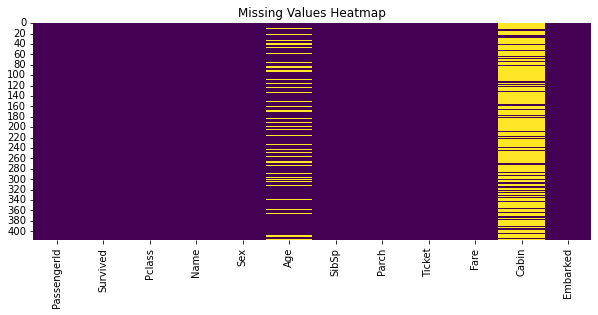

In [20]:
#Check Missing Values
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', )
plt.title("Missing Values Heatmap")
plt.show()

#### 3 - Data Cleaning

In [29]:
#Fill missing Age with Median, Drop Cabin(Too many missing) and fill Embarked mode
df['Age'].fillna(df['Age'].median(), inplace=True)
#df.drop('Cabin', axis=1, inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#### 4 - Univariate Analysis

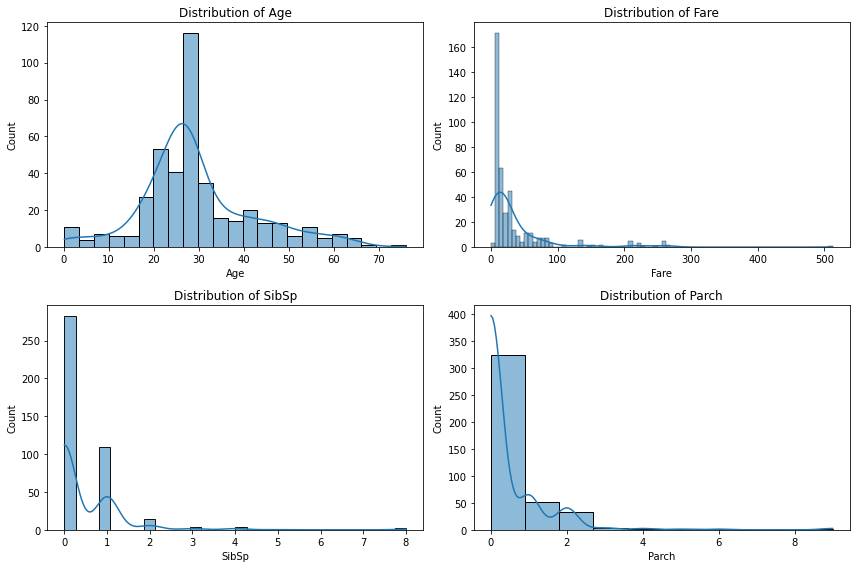

In [31]:
#Numerical Features
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(12,8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

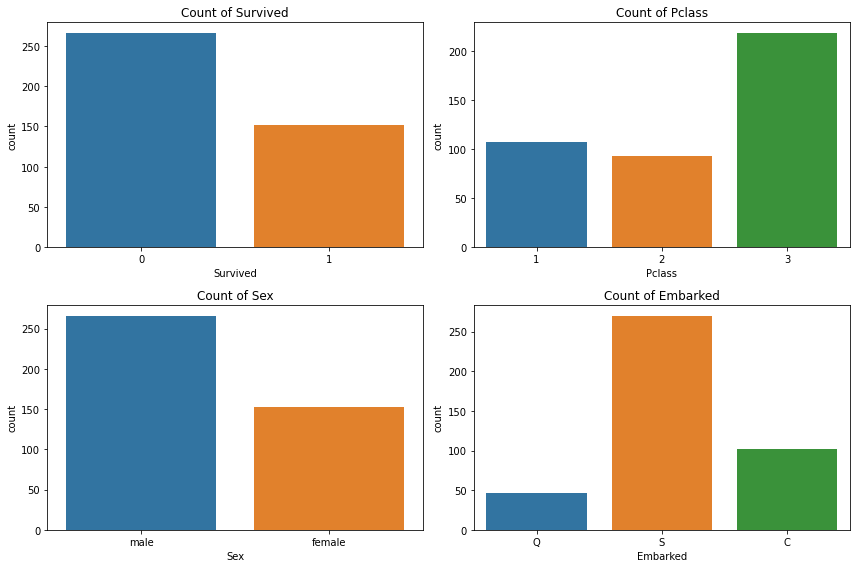

In [32]:
#Categorical Features
cat_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
plt.figure(figsize=(12,8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

#### 5 - Bivariate Analysis

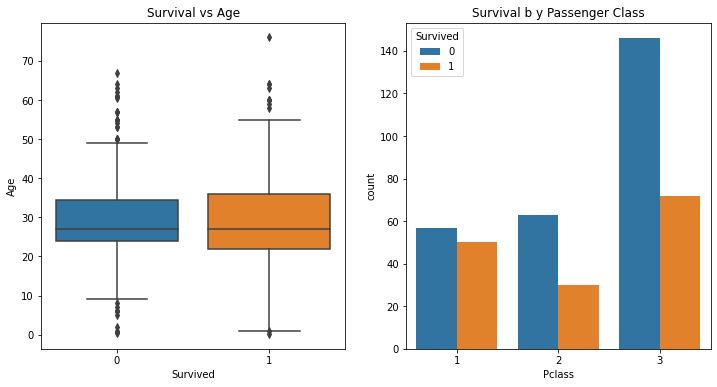

In [33]:
#Survival vs Features
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Survival vs Age")

plt.subplot(1,2,2)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival b y Passenger Class')
plt.show()

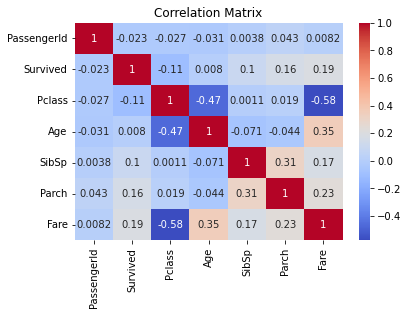

In [35]:
#Correlation Matrix
corr = df.corr()   #numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### 6 - Multivariate Analysis

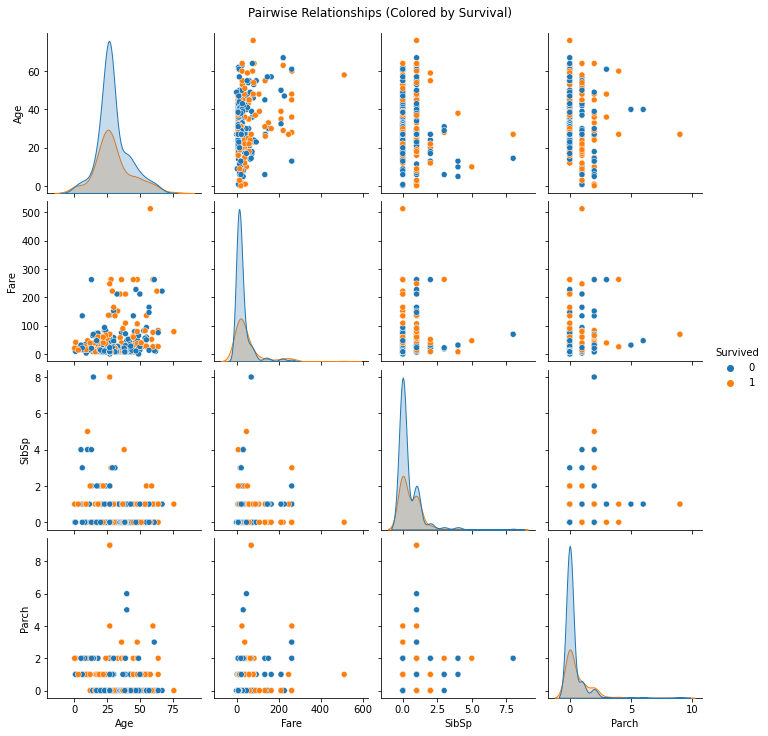

In [36]:
#Pairplot of key variables
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived')
plt.suptitle("Pairwise Relationships (Colored by Survival)", y=1.02)
plt.show()

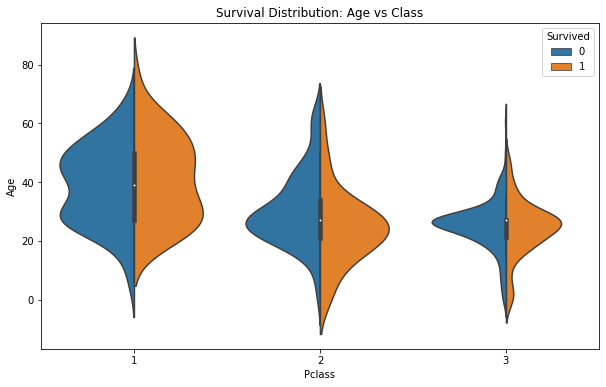

In [37]:
#Interactive Exploration: Survival Rate by Age and Class
plt.figure(figsize=(10,6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title("Survival Distribution: Age vs Class")
plt.show()

#### 7 - Key Insights

In [39]:
print("\n--- Key Insights ---")
print("1. Higher survival rates in 1st class (62.09%) vs 3rd class (24.2%).")
print("2. Females had a 74% survival rate vs 10% for Males")
print("3. Children (<10) had higher survival rates across all classes")
print("4. Strong correlation between Fare and Survival (higher fare = better survival).")



--- Key Insights ---
1. Higher survival rates in 1st class (62.09%) vs 3rd class (24.2%).
2. Females had a 74% survival rate vs 10% for Males
3. Children (<10) had higher survival rates across all classes
4. Strong correlation between Fare and Survival (higher fare = better survival).
